<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/dogbreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

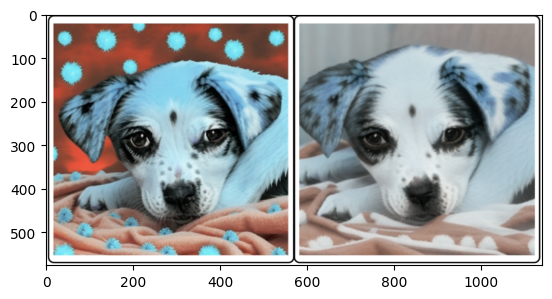


Response: This puppy appears to be a mix breed, showing characteristics that resemble those of a Dalmatian - which is evident from the spots - as well as features from another breed, possibly a hound or a terrier, suggested by the ear shape and overall facial structure. It's difficult to determine the exact mix without more information, as mixed breeds can inherit a range of physical qualities from their parent breeds.


In [6]:
#!pip install colab-env --upgrade
#!pip install openai

import colab_env
import os
import openai
import matplotlib.pyplot as plt
import cv2


import base64
import requests

# OpenAI API Key
openai.api_key = os.getenv("OPENAI_API_KEY")
#api_key = "YOUR_OPENAI_API_KEY"
api_key = os.getenv("OPENAI_API_KEY")


# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = '/content/gdrive/MyDrive/datasets/dogbreed.png'

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What’s in the breed of the dog?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

image_path = '/content/gdrive/MyDrive/datasets/dogbreed.png'
testim = cv2.imread(image_path)
plt.imshow(testim)
plt.show()
print()

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

#print(response.json())

Response=response.json()['choices'][0]['message'].get('content')

print('Response: %s'%Response)

